In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import seaborn as sns
import random

In [2]:
dataset_path = r"c:\Users\REBU\Downloads\archive\UTKFace"

In [3]:
# Firstly, our dataset has .chip extension at the end which we want to get rid of

# Iterate over all files in the directory
for filename in os.listdir(dataset_path):
    # Check if the filename contains ".chip"
    if ".chip" in filename:
        # Construct the old and new file paths
        old_filepath = os.path.join(dataset_path, filename)
        new_filename = filename.replace(".chip", "")  # Remove ".chip" from the filename
        new_filepath = os.path.join(dataset_path, new_filename)
        
        # Rename the file
        os.rename(old_filepath, new_filepath)
        
        # Print the renaming operation
        print(f"Renamed {old_filepath} to {new_filepath}")

In [4]:
# Then we got ".jpg.jpg" as extensions, remove one .jpg

for filename in os.listdir(dataset_path):
    new_filename = filename.replace(".jpg.jpg", ".jpg")
    if new_filename != filename:
        old_filepath = os.path.join(dataset_path, filename)
        new_filepath = os.path.join(dataset_path, new_filename)
        os.rename(old_filepath, new_filepath)
        print(f"Renamed {old_filepath} to {new_filepath}")

In [5]:
# Corrected filenames

filenames = os.listdir(dataset_path)
print(filenames[0])

100_0_0_20170112213500903.jpg


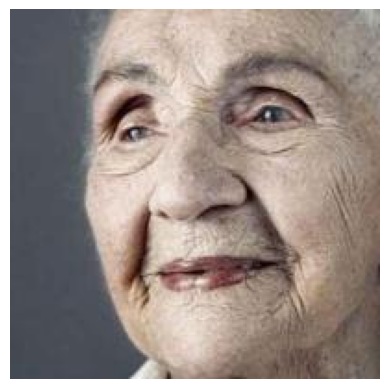

In [6]:
# Taking a look at our image

image_path = os.path.join(dataset_path, filenames[3])
image = Image.open(image_path)

plt.imshow(image)
plt.axis("off")
plt.show()

In [7]:
# Our files have age and gender information in the filenames, extracting the info

gender_list = []
age_list = []
image_paths = []

for filename in os.listdir(dataset_path):
    image_path = os.path.join(dataset_path, filename)
    temp = filename.split("_")
    gender_list.append(int(temp[1]))
    age_list.append(int(temp[0]))
    image_paths.append(image_path)

In [8]:
df = pd.DataFrame()
df['image'], df['gender_index'], df['age'] = image_paths, gender_list, age_list
df.head()

,image,gender_index,age
0,c:\Users\REBU\Downloads\archive\UTKFace\100_0_...,0,100
1,c:\Users\REBU\Downloads\archive\UTKFace\100_0_...,0,100
2,c:\Users\REBU\Downloads\archive\UTKFace\100_1_...,1,100
3,c:\Users\REBU\Downloads\archive\UTKFace\100_1_...,1,100
4,c:\Users\REBU\Downloads\archive\UTKFace\100_1_...,1,100


In [9]:
gender_dict = df['gender_index'].replace({0:"Male",1:"Female"})
df["gender"] = df['gender_index'].replace({0:"Male",1:"Female"})

In [10]:
df.to_csv("dataset.csv", index=False)

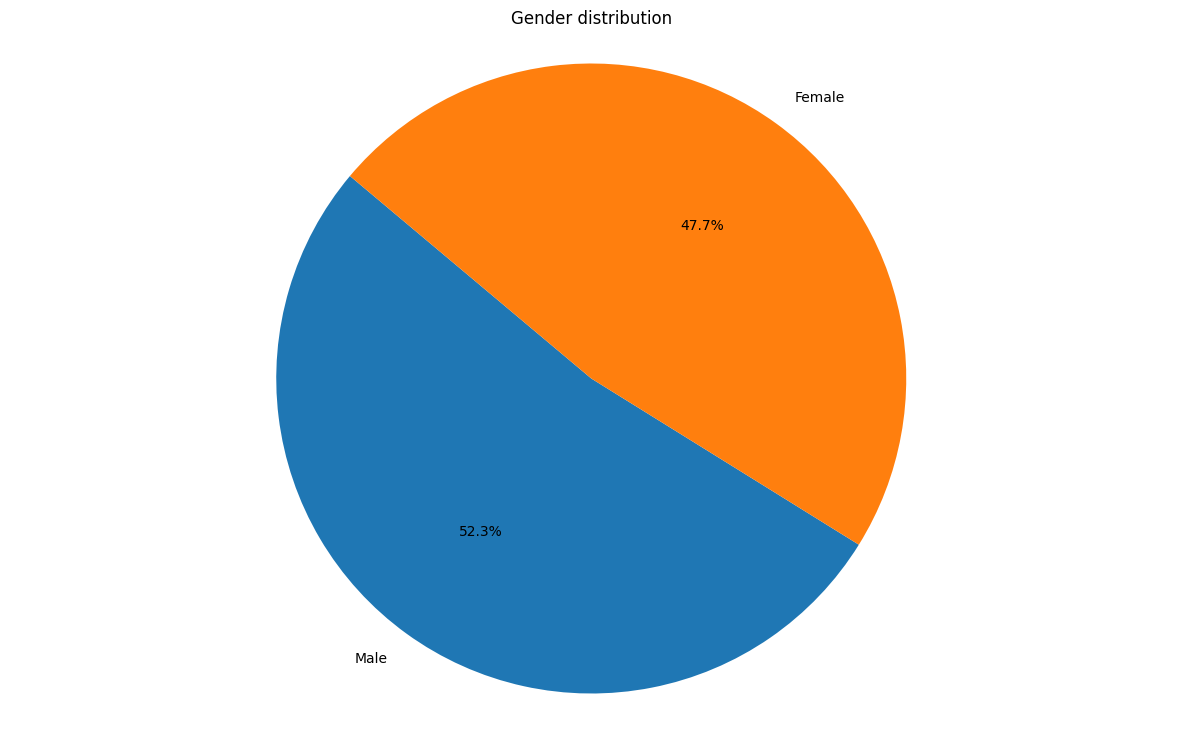

In [11]:
# View gender information

genders = df['gender'].value_counts()

plt.figure(figsize=(15, 9))
plt.pie(genders, labels=genders.index, autopct='%1.1f%%', startangle=140)
plt.title("Gender distribution")
plt.axis("equal")
plt.plot();

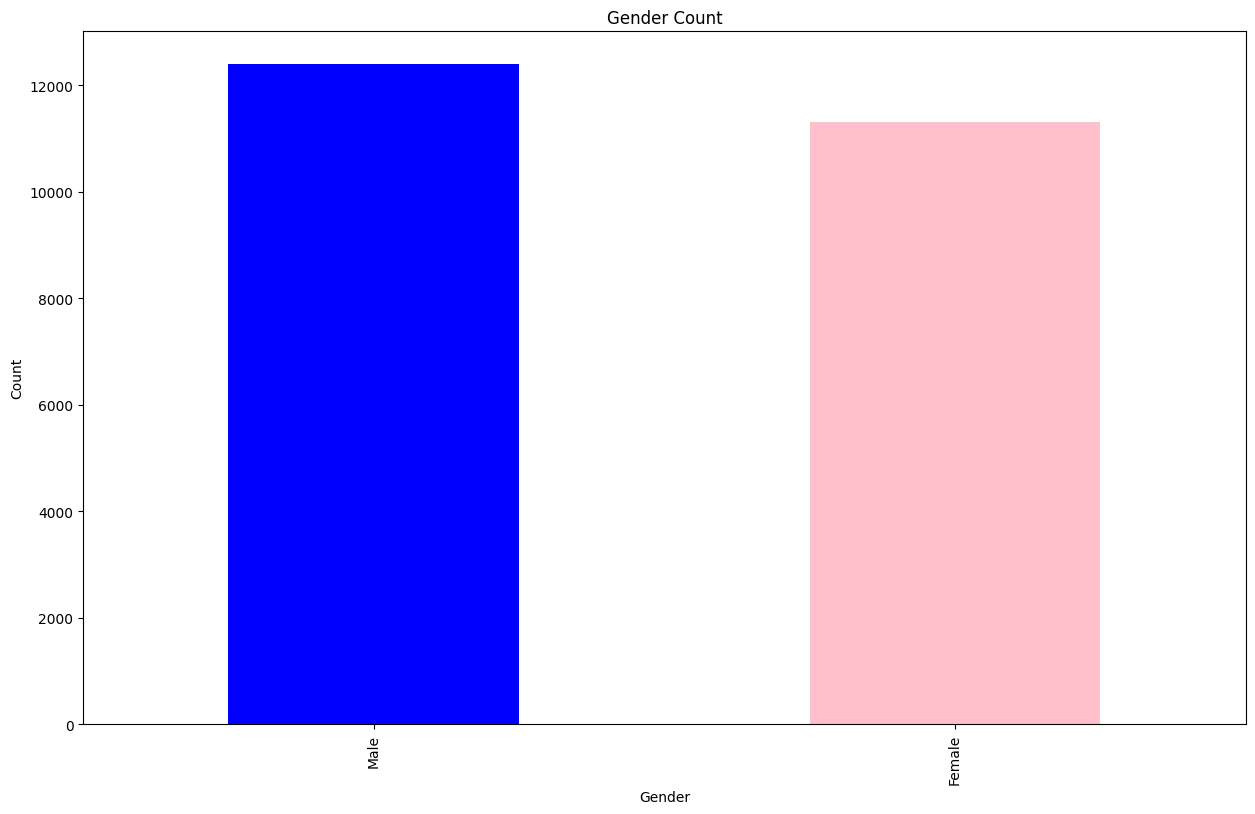

In [12]:
plt.figure(figsize=(15,9))
genders.plot(kind="bar", color=["blue", 'pink'])
plt.title("Gender Count")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.plot();

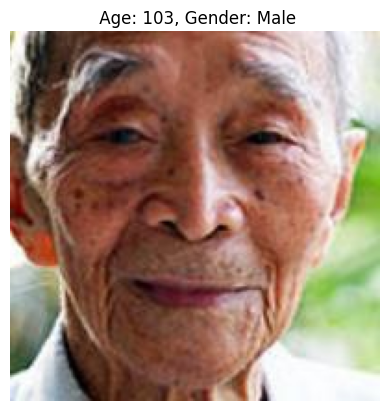

In [13]:
img = Image.open(df['image'][13])
plt.title(f' Age: {df.age[13]}, Gender: {df.gender[13]}')
plt.axis('off')
plt.imshow(img);

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from keras.applications import InceptionV3
from keras.callbacks import TensorBoard
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
import os
from keras import regularizers

In [15]:
pwd = os.getcwd()

In [16]:
dataset_path = pwd + "\\dataset.csv"

In [17]:
df = pd.read_csv(dataset_path)
df.head()

,image,gender_index,age,gender
0,c:\Users\REBU\Downloads\archive\UTKFace\100_0_...,0,100,Male
1,c:\Users\REBU\Downloads\archive\UTKFace\100_0_...,0,100,Male
2,c:\Users\REBU\Downloads\archive\UTKFace\100_1_...,1,100,Female
3,c:\Users\REBU\Downloads\archive\UTKFace\100_1_...,1,100,Female
4,c:\Users\REBU\Downloads\archive\UTKFace\100_1_...,1,100,Female


In [18]:
df['gender'] = df['gender'].astype(str)

In [19]:
train_df, test_df = train_test_split(df, test_size=0.15, random_state=42)
train_df, val_df = train_test_split(df, test_size=0.15, random_state=42)

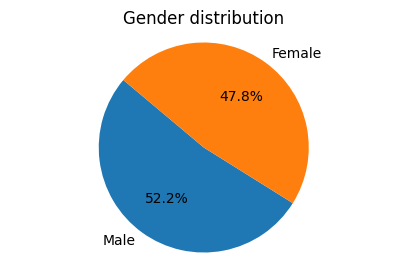

In [20]:
genders = train_df['gender'].value_counts()

plt.figure(figsize=(5,3))
plt.pie(genders, labels=genders.index, autopct='%1.1f%%', startangle=140)
plt.title("Gender distribution")
plt.axis("equal")
plt.plot();

In [21]:
test_df.head()

,image,gender_index,age,gender
17525,c:\Users\REBU\Downloads\archive\UTKFace\49_1_0...,1,49,Female
1147,c:\Users\REBU\Downloads\archive\UTKFace\17_1_0...,1,17,Female
1190,c:\Users\REBU\Downloads\archive\UTKFace\17_1_4...,1,17,Female
9731,c:\Users\REBU\Downloads\archive\UTKFace\29_0_4...,0,29,Male
7387,c:\Users\REBU\Downloads\archive\UTKFace\26_1_2...,1,26,Female


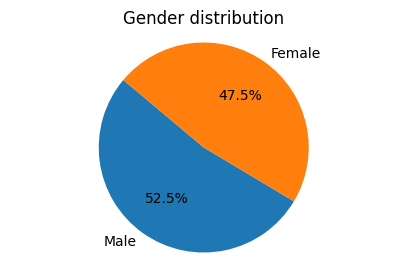

In [22]:
genders = test_df['gender'].value_counts()

plt.figure(figsize=(5,3))
plt.pie(genders, labels=genders.index, autopct='%1.1f%%', startangle=140)
plt.title("Gender distribution")
plt.axis("equal")
plt.plot();

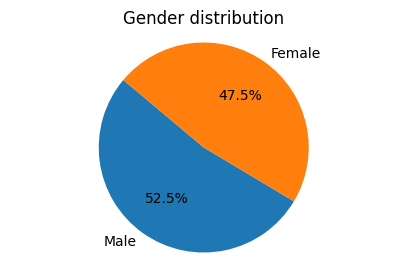

In [23]:
genders = val_df['gender'].value_counts()

plt.figure(figsize=(5, 3))
plt.pie(genders, labels=genders.index, autopct='%1.1f%%', startangle=140)
plt.title("Gender distribution")
plt.axis("equal")
plt.plot();

In [24]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
)

In [25]:
batch_size = 32
img_height = 224
img_width = 224

In [26]:
train_gen = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image',
    y_col='gender_index',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='raw',  # Use 'raw' to handle integer labels
    shuffle=True  # You can shuffle the training data
)

Found 20151 validated image filenames.


ValueError: num must be an integer with 1 <= num <= 9, not 10

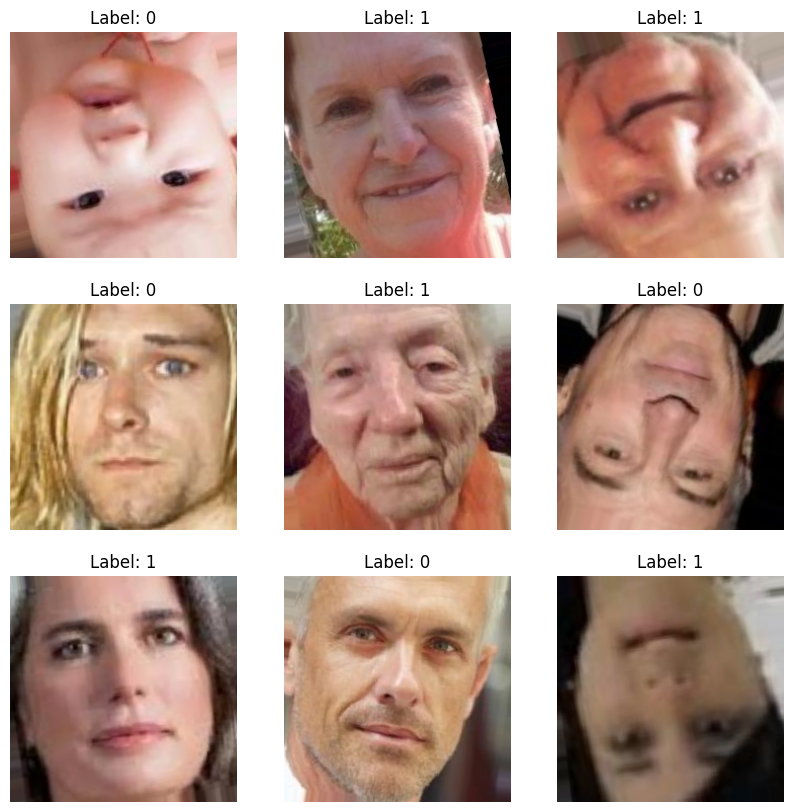

In [27]:
import matplotlib.pyplot as plt

# Retrieve a batch of data and labels from the generator
batch_images, batch_labels = next(train_gen)

# Plot the images
plt.figure(figsize=(10, 10))
for i in range(len(batch_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(batch_images[i])
    plt.title(f"Label: {batch_labels[i]}")
    plt.axis("off")
plt.show()

In [28]:
val_gen = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='image',
    y_col='gender_index',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='raw',  # Use 'raw' to handle integer labels
    shuffle=False  # No need to shuffle validation data
)

Found 3557 validated image filenames.


In [41]:
test_gen = datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='image',
    y_col='gender_index',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='raw',  # Use 'raw' to handle integer labels
    shuffle=False  # No need to shuffle validation data
)

Found 3557 validated image filenames.


In [54]:
from sklearn.metrics import classification_report
import numpy as np

In [44]:
# Get the training data
X_train, y_train = next(train_gen)

# Get the validation data
X_val, y_val = next(val_gen)

# Get the test data
X_test, y_test = next(test_gen)

In [42]:
# Extract features and labels
X_train, y_train = next(train_gen)
X_val, y_val = next(val_gen)
X_test,y_test=next(test_gen)

In [45]:
# Reshape the training data to have 2 dimensions
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_train.shape[0], -1)

In [47]:
# Initialize the decision tree classifier
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(random_state=42)
# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [48]:
# Calculate the accuracy on the training set
train_accuracy = clf.score(X_train, y_train)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

Training Accuracy: 100.00%


In [49]:
# Calculate the accuracy on the validation set
val_accuracy = clf.score(X_val, y_val)

print(f'Valiidation Accuracy: {val_accuracy * 100:.2f}%')

Valiidation Accuracy: 62.50%


In [50]:
# Calculate the accuracy on the test set
test_accuracy = clf.score(X_test,y_test)

print(f'Test Accuracy: {val_accuracy * 100:.2f}%')

Test Accuracy: 62.50%


In [51]:
# Predict the labels of the validation set
y_pred = clf.predict(X_val)
# Print the classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.76      0.68        17
           1       0.64      0.47      0.54        15

    accuracy                           0.62        32
   macro avg       0.63      0.62      0.61        32
weighted avg       0.63      0.62      0.62        32



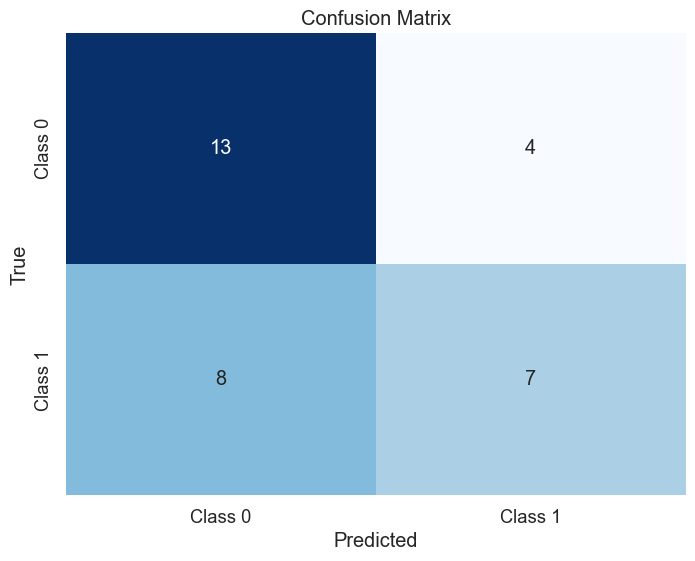

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_names = ['Class 0', 'Class 1']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [53]:
import pickle
# Save the model to a file
with open('decision_model.pkl', 'wb') as f:
    pickle.dump(clf, f)